## Arima Exercise

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month'])\
       .rename(columns={'#Passengers':'Passengers'})

**Task:** Print the top 5 rows.

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Task:** Create the function called `plot_timeseries(df)`.

In [6]:
def plot_timeseries(df):
    df.plot()
    plt.show()

**Task:** Plot the time series from above.

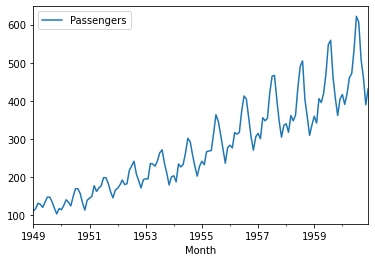

In [7]:
plot_timeseries(df)

**Task:** Compute the rolling mean and the rolling std with an appropriate window size.

In [10]:
def compute_rolling_mean(df, window):
    return df.rolling(window).mean()

def compute_rolling_std(df, window):
    return df.rolling(window).std()

**Task:** Plot the two time series:
- with rolling mean 
- with rolling std

<AxesSubplot:xlabel='Month'>

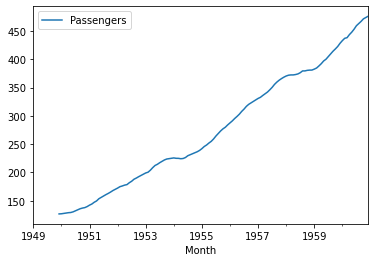

In [11]:
computer_rolling_mean(df, 12).plot(legend=True)

<AxesSubplot:xlabel='Month'>

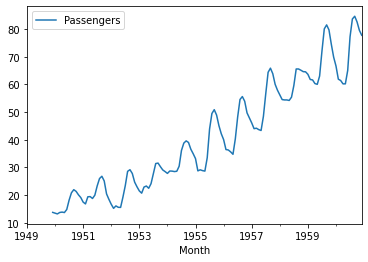

In [12]:
computer_rolling_std(df, 12).plot(legend=True)

**Task:** Test the stationarity of all the time series

In [14]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

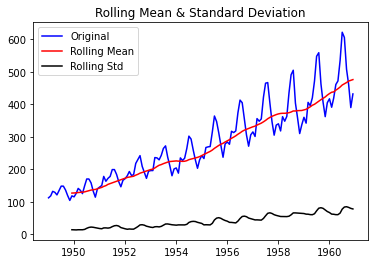

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [15]:
test_stationarity(df['Passengers'])

**Task:** Perform a log transformation on the original time series. 

In [16]:
# log transform
df_log = np.log(df)

**Task:** Plot the transformed time series.

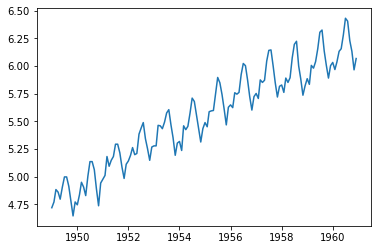

In [18]:
plt.plot(df_log)

**Task:** Test the stationarity of the transformed time series. If it isn't stationary, try a different transformation technique. 

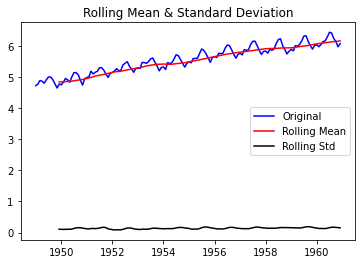

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
test_stationarity(df_log)

In [25]:
df_log.values

array([[4.71849887],
       [4.77068462],
       [4.88280192],
       [4.8598124 ],
       [4.79579055],
       [4.90527478],
       [4.99721227],
       [4.99721227],
       [4.91265489],
       [4.77912349],
       [4.6443909 ],
       [4.77068462],
       [4.74493213],
       [4.83628191],
       [4.94875989],
       [4.90527478],
       [4.82831374],
       [5.00394631],
       [5.13579844],
       [5.13579844],
       [5.06259503],
       [4.89034913],
       [4.73619845],
       [4.94164242],
       [4.97673374],
       [5.01063529],
       [5.18178355],
       [5.0937502 ],
       [5.14749448],
       [5.18178355],
       [5.29330482],
       [5.29330482],
       [5.21493576],
       [5.08759634],
       [4.98360662],
       [5.11198779],
       [5.14166356],
       [5.19295685],
       [5.26269019],
       [5.19849703],
       [5.20948615],
       [5.38449506],
       [5.43807931],
       [5.48893773],
       [5.34233425],
       [5.25227343],
       [5.14749448],
       [5.267

**Task:** Use the stationary time series and find the optimal `(p, d, q)` parameters of ARIMA model.

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 122.261
Date:                Mon, 08 Nov 2021   AIC                           -238.522
Time:                        18:15:24   BIC                           -229.633
Sample:                    01-31-1949   HQIC                          -234.910
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2414      0.101      2.381      0.017       0.043       0.440
ar.L2         -0.1667      0.100     -1.665      0.096      -0.363       0.030
sigma2         0.0106      0.002      6.020      0.0

/var/folders/wg/4yj17hrn3q9g_27l8zsxxy5m0000gn/T/ipykernel_3904/3686972330.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


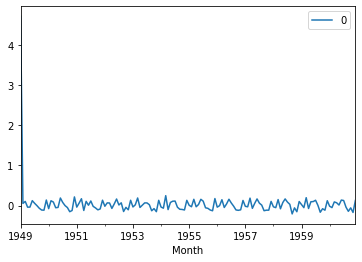

In [29]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# fit arima model
model = ARIMA(df_log, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

**Task:** Plot the predictions (not transformed to the original scale).

In [30]:
# plot predictions
predictions = model_fit.predict(start=0, end=len(df_log)-1, typ='levels')


**Task:** Plot the predictions (transformed to the original scale).

In [42]:
# plot predicitions
df_log.reset_index(inplace=True)


In [44]:
# stuck.

**Task:** Plot the predictions for the next 10 years. How accurate do you think your model is predicting that far in the future? 